
# Project: TMDB Movies
### The goal of the project is to go through the dataset and using numpy, pandas and matplotlib to analysis the data and answers questions about it.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

###  the data set contains information about 10,000 movies collected from The Movie Database (TMDB).
### the data set contains :
#### Total Rows = 10866
#### Total Columns = 21

In [4]:
# Importing Requied libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties
### 1-Data Gathering

In [5]:
# load the csv file and store it in the variable "df_movie" 
df_movie = pd.read_csv('tmdb-movies.csv')

### 2-Data Assessing

In [6]:
# print five rows of the dataset
df_movie.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df_movie.shape

(10866, 21)

In [8]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
df_movie.budget.value_counts()

0            5696
20000000      190
15000000      183
25000000      178
10000000      176
30000000      165
5000000       141
40000000      134
35000000      128
12000000      120
50000000      112
6000000       109
8000000       102
3000000       101
60000000       99
7000000        92
4000000        84
2000000        81
18000000       74
1000000        73
70000000       66
11000000       65
45000000       64
80000000       62
13000000       59
17000000       59
14000000       56
22000000       54
3500000        52
75000000       51
             ... 
9100000         1
34200000        1
818418          1
14200000        1
8400000         1
22997992        1
7000            1
220000          1
23600000        1
1645000         1
82500000        1
27220000        1
5112027         1
75              1
1052753         1
225000          1
115             1
12000           1
163000000       1
2240000         1
786675          1
4250000         1
207000000       1
61733           1
19885552  

In [11]:
df_movie.revenue.value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
5000000         6
2000000         6
13000000        5
20000000        5
14000000        5
30000000        5
7000000         4
4300000         4
4000000         4
1000000         4
50000000        4
25000000        4
60000000        3
6700000         3
11              3
16000000        3
15              3
29000000        3
21000000        3
100000000       3
102000000       3
3               3
16              3
2500000         3
70000000        3
             ... 
42721196        1
79958599        1
40084041        1
442965          1
50752337        1
30857814        1
1400000         1
7027290         1
303788635       1
10300000        1
45916769        1
26049082        1
211989043       1
41009669        1
346079773       1
4729352         1
23159305        1
272742922       1
525             1
2626800         1
39946780        1
3117985         1
22270           1
65884703        1
4500000   

In [12]:
sum(df_movie.duplicated())

1

In [13]:
df_movie.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Observation From The Dataset

#### *-The Currency for data has not given. so i will assume the currency is in US dollor.
#### *-The dataset contain lots of movies where the budget or revenue have a value of '0' and it will be unuseful.

### Issues need to be cleaned:
#### 1- There are columns that don't help you in analysis the project.
#### 2- relese_date is object type.
#### 3- there are many movies that has illogical budget like (0, 75,115,....) so it will give us alot of  outlier and bad analysis for data 
#### 4- there are many movies that has unuseful revenue like (0, 3,15,16, ....) so it will give us alot of  outlier and bad analysis for data.
#### 5- there is a duplicated row that must be removed.
#### 6- there are a null values in (director,production_companies) so we will remove null values.


### 3- Data Cleaning:

#### *Make copy form data to clean it . 

In [14]:
df_movie_clean = df_movie.copy()

#### 1-  Delete columns that don't help you in analysis the project . 

In [15]:
#deleting the columns that we don't need
df_movie_clean.drop(['cast','tagline','homepage','keywords','overview','budget_adj','revenue_adj','imdb_id' ], axis=1 , inplace=True)

In [16]:
#previewing the new dataset
df_movie_clean.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


#### 2- Change relese_date to be data time.

In [17]:
df_movie_clean.release_date = pd.to_datetime(df_movie_clean.release_date)

In [18]:
# check that the release_date has been changed to datetime type
df_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 1.1+ MB


#### 3- Remove illogical budget , to make sense we will make min budget more than 10000.

In [19]:
budget_clean = df_movie_clean.query("budget < 10000").index

In [20]:
budget_clean

Int64Index([   30,    36,    72,    74,    75,    88,    92,    95,   100,
              101,
            ...
            10854, 10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863,
            10864],
           dtype='int64', length=5764)

In [21]:
# Remove movies
df_movie_clean.drop(budget_clean,inplace=True)

In [22]:
# check that movie we dont need has been removed
df_movie_clean.query("budget < 10000").head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


#### 4- Remove unuseful revenue , to make sense we will make min revenue not less than 10000.

In [23]:
revenue_clean = df_movie_clean.query("revenue < 10000").index

In [24]:
revenue_clean 

Int64Index([   48,    67,    93,   133,   145,   149,   154,   156,   159,
              165,
            ...
            10802, 10810, 10815, 10820, 10824, 10827, 10832, 10841, 10855,
            10865],
           dtype='int64', length=1300)

In [25]:
# Remove movies 
df_movie_clean.drop(revenue_clean,inplace=True)

In [26]:
# check that movies we dont need has been removed
df_movie_clean.query("revenue < 10000").head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


#### 5- Delete duplicated rows.

In [27]:
df_movie_clean.drop_duplicates(inplace=True)

In [28]:
sum(df_movie_clean.duplicated())

0

In [29]:
df_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 10848
Data columns (total 13 columns):
id                      3801 non-null int64
popularity              3801 non-null float64
budget                  3801 non-null int64
revenue                 3801 non-null int64
original_title          3801 non-null object
director                3800 non-null object
runtime                 3801 non-null int64
genres                  3801 non-null object
production_companies    3758 non-null object
release_date            3801 non-null datetime64[ns]
vote_count              3801 non-null int64
vote_average            3801 non-null float64
release_year            3801 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 415.7+ KB


#### 6- remove null values in (director,production_companies).

In [30]:
df_movie_clean = df_movie_clean[df_movie_clean['production_companies'].notna()]

In [31]:
df_movie_clean = df_movie_clean[df_movie_clean['director'].notna()]

In [32]:
df_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 10848
Data columns (total 13 columns):
id                      3757 non-null int64
popularity              3757 non-null float64
budget                  3757 non-null int64
revenue                 3757 non-null int64
original_title          3757 non-null object
director                3757 non-null object
runtime                 3757 non-null int64
genres                  3757 non-null object
production_companies    3757 non-null object
release_date            3757 non-null datetime64[ns]
vote_count              3757 non-null int64
vote_average            3757 non-null float64
release_year            3757 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 410.9+ KB


In [33]:
rows, col = df_movie_clean.shape
print('So after cleaning the data , we now have only {} number of movies and {} column.'.format(rows-1, col))

So after cleaning the data , we now have only 3756 number of movies and 13 column.


<a id='eda'></a>
## Exploratory Data Analysis



## Research Question (1): Which Movies had most and least profit?

In [34]:
#calculate Profit for each of the movie and add a new column in the dataframe name 'Profit'
df_movie_clean['Profit'] = df_movie_clean['revenue'] - df_movie_clean['budget']

In [35]:
def min_max(x):
    #use the function 'idmax' to find the index of Highest profit movie.
    high_movie = df_movie_clean[x].idxmax()
    #use the function 'idmin' to find the index of lowest profit movie.
    min_movie = df_movie_clean[x].idxmin()
    # make dataframe to get all information about the min & max movie 
    high = pd.DataFrame(df_movie_clean.loc[high_movie,:])
    low = pd.DataFrame(df_movie_clean.loc[min_movie,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df_movie_clean['original_title'][high_movie])
    print("Movie Which Has Lowest "+ x + "  : ",df_movie_clean['original_title'][min_movie])
    return pd.concat([high,low],axis = 1)

#calling the function
min_max('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Here we can see that (Avater) movie has the highest profit in all movies , making over 2.5B in profit in this dataset and (The Warrior's Way ) is the least in all movies it lost more than 400M

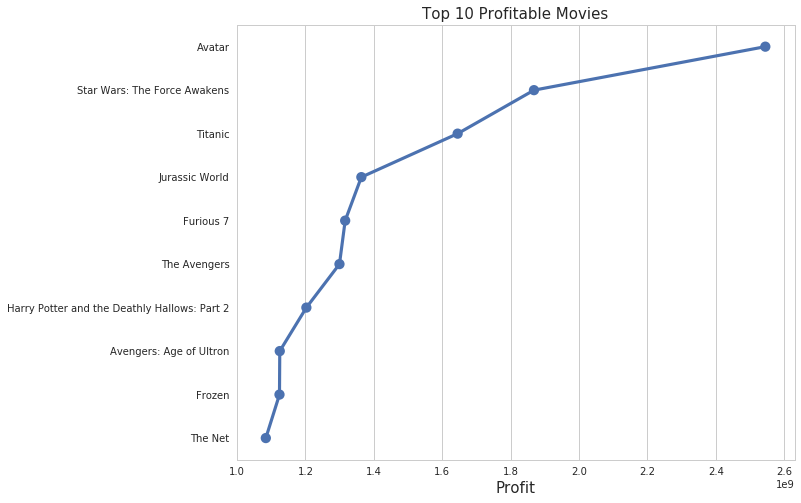

In [40]:
# make a plot which contain top 10 movies which earn highest profit.
# sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(df_movie_clean['Profit'].sort_values(ascending = False))
info['original_title'] = df_movie_clean['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

# make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,8)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 15)
sns.set_style("whitegrid")

## Research Question 2 : Which movie has the largest and lowest revenue?


In [41]:
#use 'min_max' function which we made earlier
min_max('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Chaos


,1386,6274
id,19995,5289
popularity,9.43277,0.79295
budget,237000000,12000000
revenue,2781505847,10289
original_title,Avatar,Chaos
director,James Cameron,Tony Giglio
runtime,162,106
genres,Action|Adventure|Fantasy|Science Fiction,Drama|Action|Crime
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Epsilon Motion Pictures|...
release_date,2009-12-10 00:00:00,2005-01-17 00:00:00


### Here we can see that (Avater) movie has the highest revenue in all movies , making over 2.7B in this dataset and (Chaos) has the lowest revenue among all movies

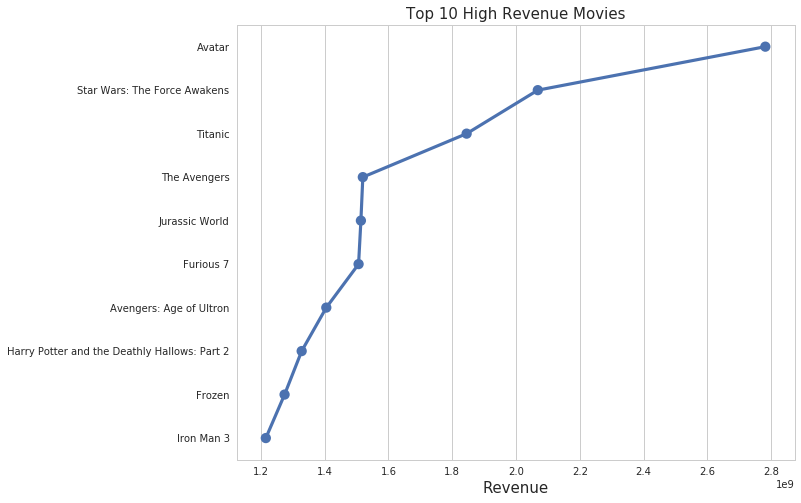

In [42]:
# make a plot which contain top 10 movies which earn highest revenue.
# sort the 'revenue' column in decending order and store it in the new dataframe,
info = pd.DataFrame(df_movie_clean['revenue'].sort_values(ascending = False))
info['original_title'] = df_movie_clean['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['revenue'][:10])

# make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,8)})
#setup the title and labels of the plot.
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 15)
sns.set_style("whitegrid")

## Research Question 3 : which Movie has the highest and lowest budget?

In [43]:
#use 'min_max' function which we made earlier
min_max('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Eraserhead


,2244,1354
id,46528,985
popularity,0.25054,0.331417
budget,425000000,10000
revenue,11087569,7000000
original_title,The Warrior's Way,Eraserhead
director,Sngmoo Lee,David Lynch
runtime,100,89
genres,Adventure|Fantasy|Action|Western|Thriller,Science Fiction|Fantasy|Horror|Drama
production_companies,Boram Entertainment Inc.,American Film Institute (AFI)|Libra Films
release_date,2010-12-02 00:00:00,1977-03-19 00:00:00


### Here we can see that (The Warrior's Way) movie has the highest badget in all movies , and (Eraserhead) has the lowest revenue among all movies

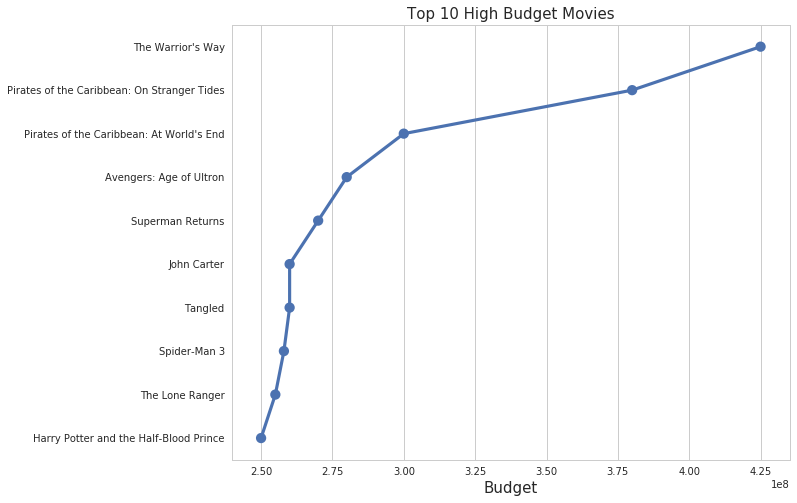

In [44]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df_movie_clean['budget'].sort_values(ascending = False))
info['original_title'] = df_movie_clean['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])

# make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,8)})
#setup the title and labels of the plot.
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 15)
sns.set_style("whitegrid")

## Research Question 4: Which genre has the highest release of movies?

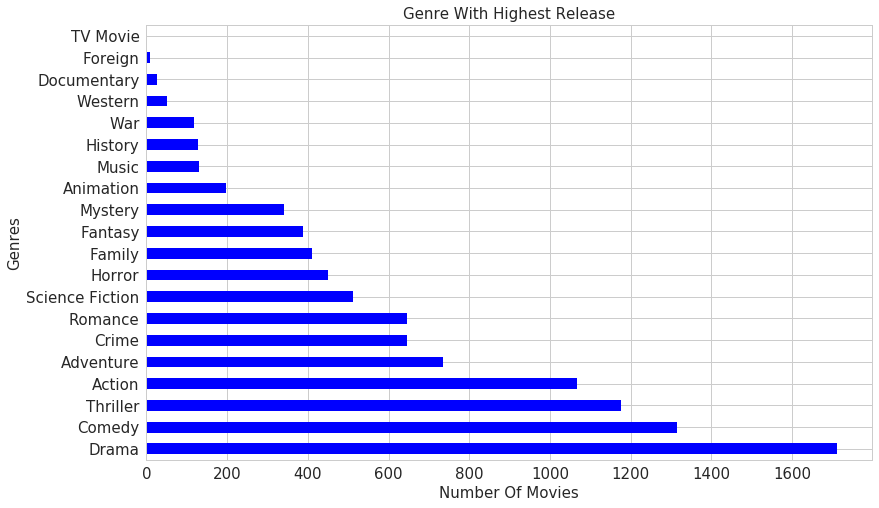

In [45]:
#make a function will will split the strings in genres and return the count of each genre.
def count_genre(i):
    #concatenate all the rows of the genrs the split them.
    movie_genre = df_movie_clean[i].str.cat(sep = '|')
    movie = pd.Series(movie_genre.split('|'))
    #count each of the genre
    counts_genres = movie.value_counts(ascending=False)
    return counts_genres

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot.
total_genre_movies.plot(kind= 'barh',figsize = (13,8),fontsize=15,color = 'blue')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

### According to the plot Drama genre has the highest release of movies followed by Comedy then Thriller.



## Research Question 5 : Which year has the highest release of movies?

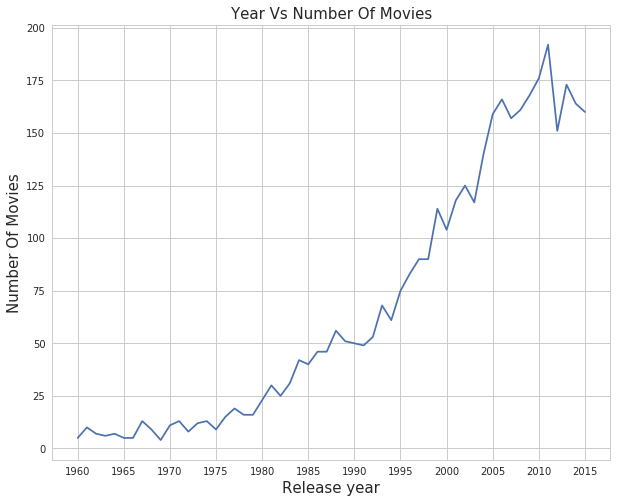

In [46]:
# make a group of data according to the (release_year) and count number of movies in this year
df_movie_clean.groupby('release_year').id.count().plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Year Vs Number Of Movies",fontsize = 15)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15)
sns.set_style("whitegrid")

###  the plot and the output shows that year 2011 has the highest release of movies followed by year 2013 .

### Reasearch Question 6: Top 10 production companies with number of movies?


In [ ]:
# we will use the same function count_genre
production_companies = count_genre('production_companies')

#plot he barh plot.
production_companies.iloc[:10].plot(kind='barh',figsize=(16,8),fontsize=15)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=15)
sns.set_style("whitegrid")

###  the plot and the output shows that the Universal Pictures is on the top of companies.

<a id='conclusions'></a>
## Conclusions
#### * Avater movie has the highest profit in all movies , making over 2.5B.
#### * The Warrior's Way movie is the least in all movies it lost more than 400M.
#### * Avater movie has the highest revenue in all movies , making over 2.7B.
#### * Chaos movie has the lowest revenue among all movies.
#### * The Warrior's Way movie has the highest badget in all movies.
#### * Eraserhead movie has the lowest revenue among all movies.
#### * Drama genre has the highest release of movies followed by Comedy then Thriller.
#### * year 2011 has the highest release of movies followed by year 2013 .
#### * the Universal Pictures is on the top of companies releases movies . 

In [92]:
df_movie_clean.to_csv('df_movie_clean.csv', index=False)